## Importing Libraries

In [24]:
#!pip install shap
#!pip install lime
!pip install --upgrade scikit-learn
#pip install pandas shap matplotlib ipython for visual studio

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/b1/ed/051ea344b38c8e0310c4eba02593d446e35656ed1328de7bd058e9223310/scikit_learn-1.4.2-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
   ---------------------------------------- 10.6/10.6 MB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 301.8/301.8 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular
import pickle
#!pip install huggingface_hub transformers sentence_transformers

## Exploratory Data Analysis & Removal of Redundant or Highly Correlated Data

In [2]:
#load the dataset
train_data = pd.read_csv('Train_data.csv')

#Checking which columns are categorical so we can encode them before performing EDA
print("Categorical columns: ",train_data.select_dtypes(include=['object']).columns.tolist())
print("All columns: ",train_data.columns)
train_data['protocol_type']

Categorical columns:  ['protocol_type', 'service', 'flag', 'class']
All columns:  Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


0        tcp
1        udp
2        tcp
3        tcp
4        tcp
        ... 
25187    tcp
25188    tcp
25189    tcp
25190    tcp
25191    tcp
Name: protocol_type, Length: 25192, dtype: object

           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.4888

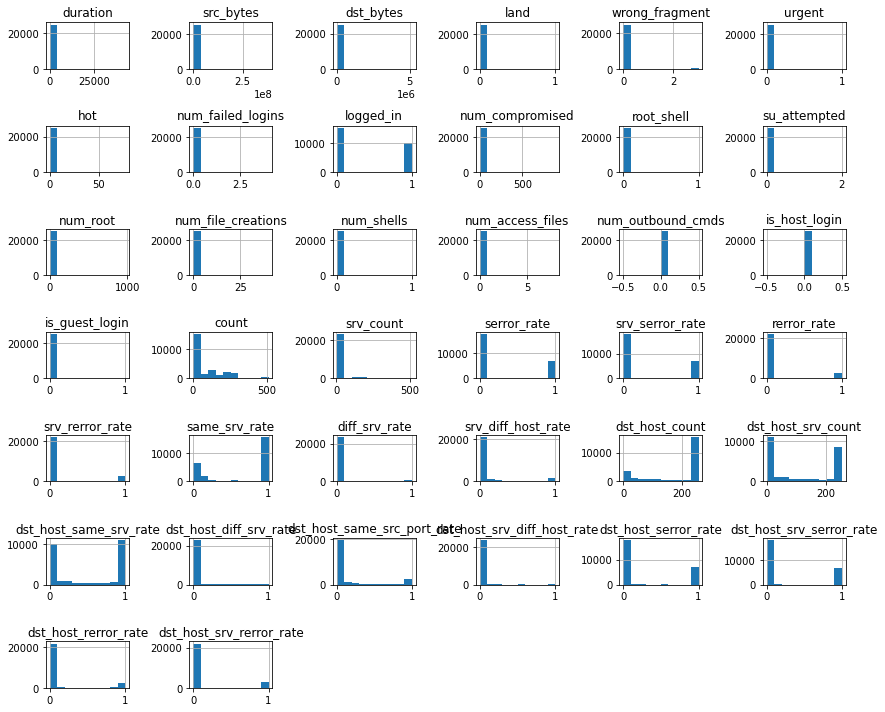

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [3]:
#convert categorical columns into numerical columns using one-hot encoding
categorical_cols = ['protocol_type', 'service', 'flag']
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
#Explore the dataset
print(train_data_encoded.describe())

#pot a histogram for numerical features
numerical_features = train_data_encoded.select_dtypes(include=['int64', 'float64']).columns
train_data_encoded[numerical_features].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

#checking null values & label class distribution
print(train_data.isnull().sum())
print(train_data['class'].value_counts())


#### Correlation Matrix before Removal of Highly Correlated Features

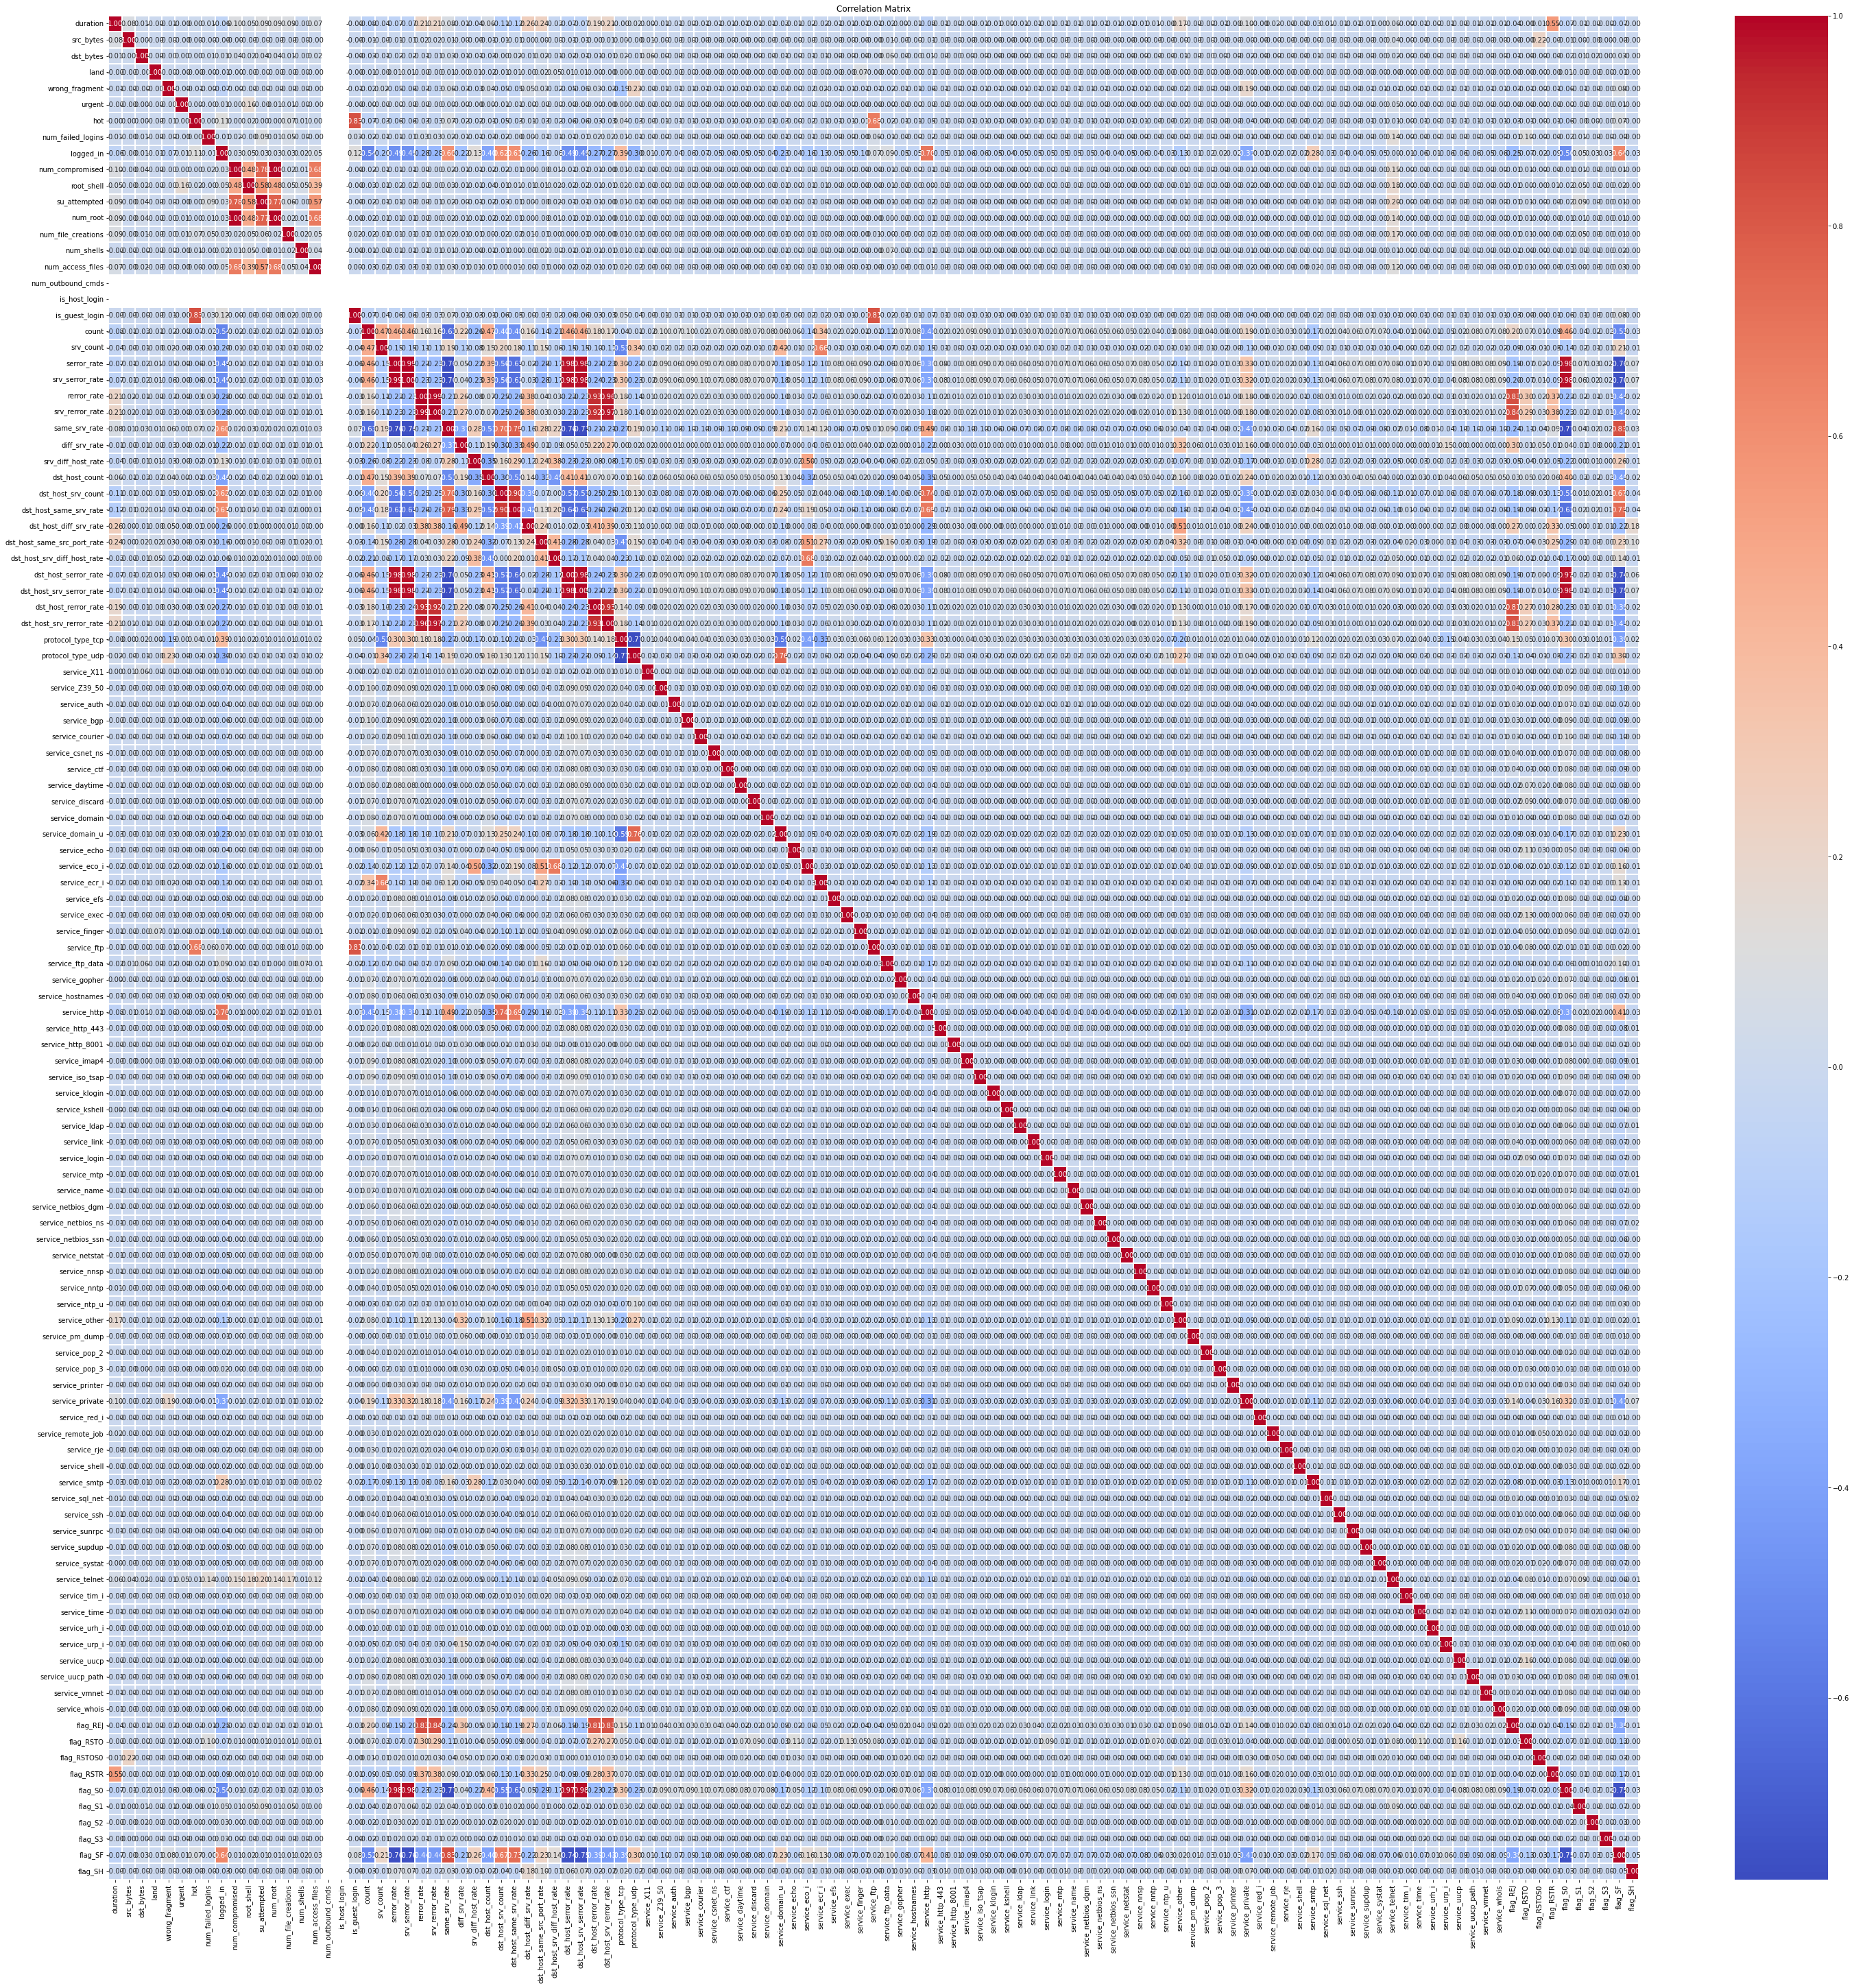

In [4]:
plt.figure(figsize=(50, 50))
corr_matrix = train_data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

#### Removal of Highly Correlated Features

In [5]:
#dropping highly correlated data
train_data_encoded = train_data_encoded.drop(['root_shell','su_attempted','num_root','dst_host_same_srv_rate','srv_serror_rate','srv_rerror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'], axis=1)

#### Correlation Matrix after Removal of Highly Correlated Features

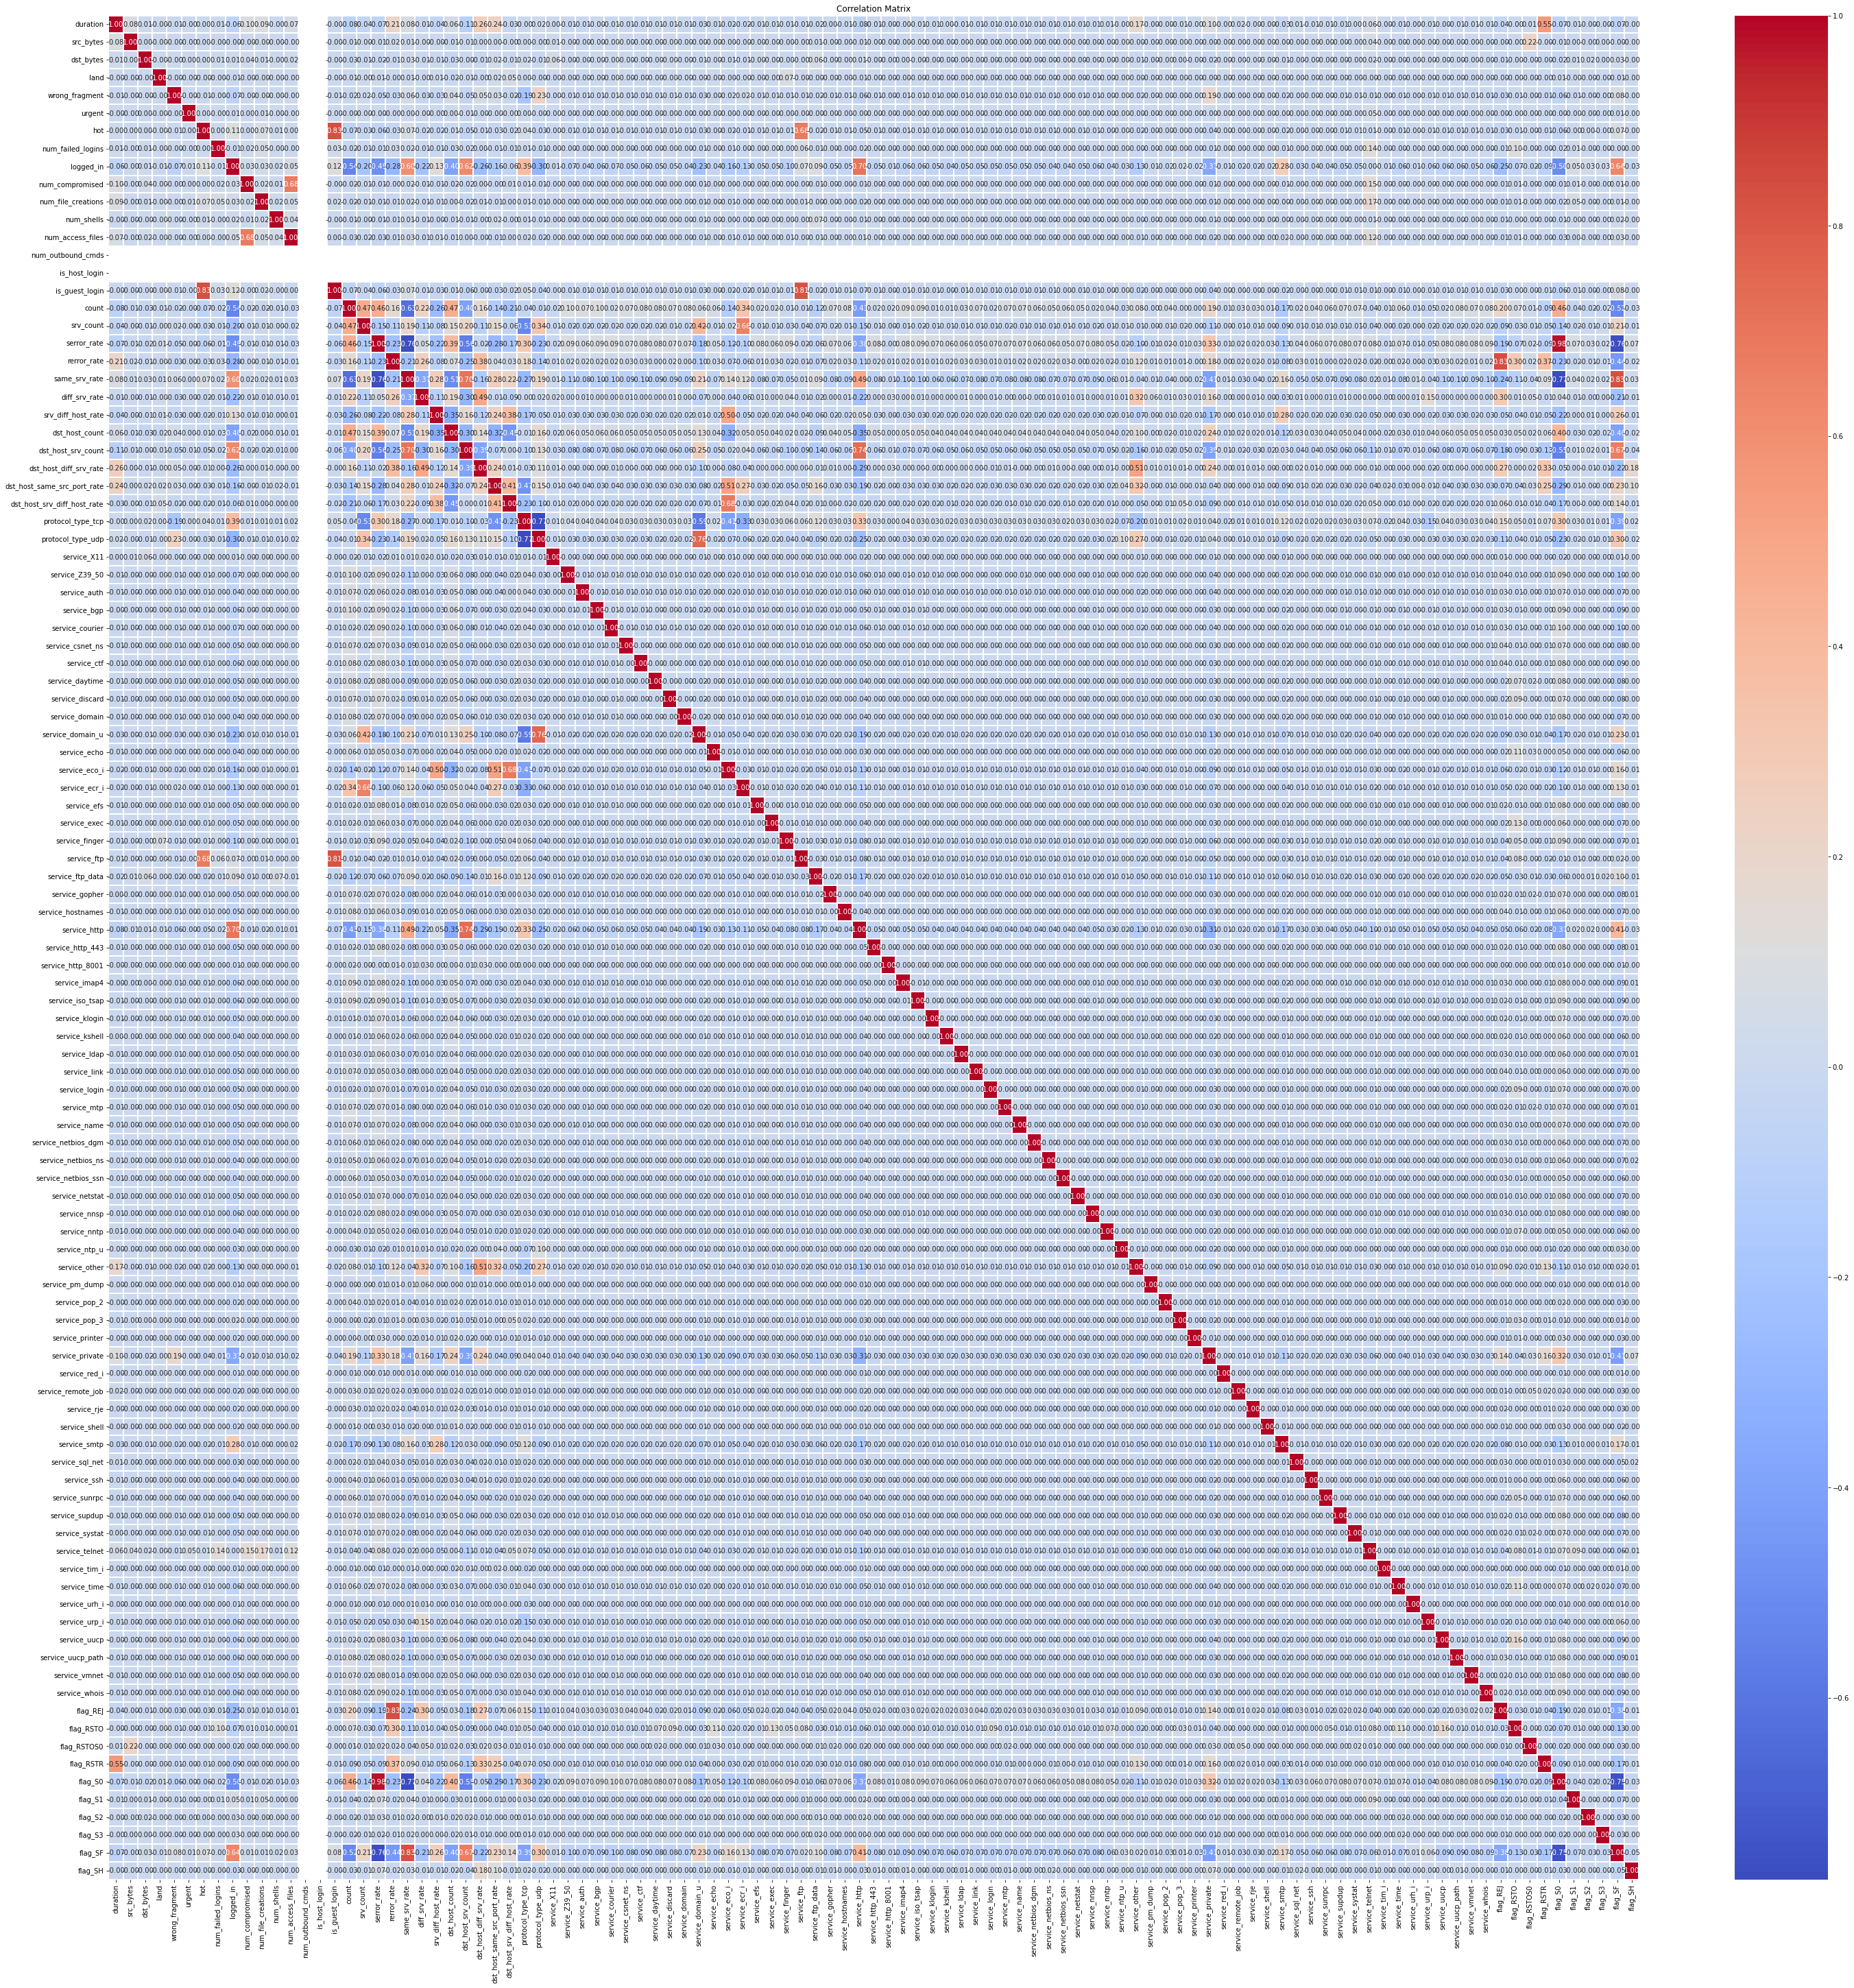

In [6]:
plt.figure(figsize=(50, 50))
corr_matrix = train_data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

## Feature Selection using KBest Method

In [7]:
X = train_data_encoded.drop(columns=['class'])
y = train_data_encoded['class']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))

#attempting to visualize feature importance and validate the k best method results
#model = RandomForestClassifier()
#model.fit(X, y)
#feature_importances = pd.Series(model.feature_importances_, index=X.columns)
#feature_importances.nlargest(10).plot(kind='barh')
#plt.show()

#sort feature scores dataframe by 'Score' column in descending order
sorted_features = feature_scores.sort_values(by='Score', ascending=False)

#top k features (top 10) selected
k = 10  #adjustable value
best_features = sorted_features.head(k)['Feature'].tolist()

print(f"Best {k} Features:")
print(best_features)

                Feature         Score
103             flag_SF  33753.436873
20        same_srv_rate  32237.024062
24   dst_host_srv_count  27004.333298
8             logged_in  22650.570410
99              flag_S0  18451.328420
..                  ...           ...
17            srv_count      0.141515
3                  land      0.009214
7     num_failed_logins      0.000019
13    num_outbound_cmds           NaN
14        is_host_login           NaN

[105 rows x 2 columns]
Best 10 Features:
['flag_SF', 'same_srv_rate', 'dst_host_srv_count', 'logged_in', 'flag_S0', 'serror_rate', 'count', 'service_http', 'service_private', 'dst_host_count']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [13 14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [8]:
#keep only the top k features & remove the rest for use in ML & ANN models later
X_selected = X.loc[:, best_features]
#label Encoding for the target variable 'y'
le = LabelEncoder()
y_train_encoded = le.fit_transform(y)



In [9]:
y_train_df = pd.DataFrame(y_train_encoded, columns=['class'])
k_best_with_class = pd.concat([X_selected, y_train_df], axis=1)

k_best_with_class.to_csv('k_best.csv')

# Training Machine Learning Models & Evaluating their Performances

In [18]:
#warnings.filterwarnings("ignore")

#standardizing X_selected feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_selected)

#initializing our classifiers
knn_clf = KNeighborsClassifier(n_neighbors=7)
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2,min_samples_leaf=1,criterion='gini')
nb_clf = GaussianNB()
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=2,min_samples_leaf=1,criterion='gini')
gb_clf = GradientBoostingClassifier()
lr_clf = LogisticRegression()

#initializing the voting classifier with 'hard' voting
voting_clf = VotingClassifier(estimators=[
    ('knn', knn_clf),
    ('dt', dt_clf),
    ('nb', nb_clf),
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('lr', lr_clf)
], voting='hard')
#training the models
knn_clf.fit(X_train_scaled, y_train_encoded)
dt_clf.fit(X_train_scaled, y_train_encoded)
nb_clf.fit(X_train_scaled, y_train_encoded)
rf_clf.fit(X_train_scaled, y_train_encoded)
gb_clf.fit(X_train_scaled, y_train_encoded)
lr_clf.fit(X_train_scaled, y_train_encoded)
voting_clf.fit(X_train_scaled, y_train_encoded)

#printing details of models
models_names = ['K-NN', 'Decision Tree', 'Naïve Bayes', 'Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Voting Classifier']
models = [knn_clf, dt_clf, nb_clf, rf_clf, gb_clf, lr_clf, voting_clf]
accuracies = []
for model in models:
    accuracy = accuracy_score(y_train_encoded, model.predict(X_train_scaled))
    accuracies.append(accuracy)

#storing results in a list of lists
results = [[name, accuracy] for name, accuracy in zip(models_names, accuracies)]

#printing the accuracies table
print(tabulate(results, headers=['Model', 'Accuracy']))


for name, model in zip(models_names, models):
    y_pred = model.predict(X_train_scaled)
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train_encoded, y_pred))
    print("Classification Report:")
    print(classification_report(y_train_encoded, y_pred))
    print(f"Precision: {precision_score(y_train_encoded, y_pred):.4f}")
    print(f"Recall: {recall_score(y_train_encoded, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_train_encoded, y_pred):.4f}")
    print("-" * 50)

Model                  Accuracy
-------------------  ----------
K-NN                   0.977652
Decision Tree          0.960861
Naïve Bayes            0.912353
Random Forest          0.977691
Gradient Boosting      0.968244
Logistic Regression    0.928271
Voting Classifier      0.969276
Model: K-NN
Confusion Matrix:
[[11373   370]
 [  193 13256]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11743
           1       0.97      0.99      0.98     13449

    accuracy                           0.98     25192
   macro avg       0.98      0.98      0.98     25192
weighted avg       0.98      0.98      0.98     25192

Precision: 0.9728
Recall: 0.9856
F1 Score: 0.9792
--------------------------------------------------
Model: Decision Tree
Confusion Matrix:
[[11152   591]
 [  395 13054]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     1174

In [11]:
#saving the trained lr classifier to a pickle file
with open('lrclf.pkl', 'wb') as file:
    pickle.dump(lr_clf, file)

In [12]:
#load the saved  model from the pickle file
with open('lrclf.pkl', 'rb') as file:
    lr_clf = pickle.load(file)

here's how each model works:

1. K-Nearest Neighbors (K-NN):
   K-NN is a simple and intuitive classification algorithm. It classifies data points based on the majority class      of their nearest neighbors.
   The 'K' in K-NN represents the number of nearest neighbors considered for classification. When a new data point    is to be classified, K-NN calculates the distance to its K nearest neighbors and assigns the class that is most    common among these neighbors to the new data point.

2. Decision Tree:
   A Decision Tree is a flowchart-like structure where each internal node represents a decision based on a feature,    each branch represents an outcome of the decision, and each leaf node represents a class label.
   Decision Trees are used for both classification and regression tasks. They work by splitting the dataset into      smaller subsets based on the features that lead to the most significant information gain or reduction in            impurity (e.g., Gini impurity or entropy) at each node.

3. Naïve Bayes:
   Naïve Bayes is a probabilistic classifier based on Bayes' theorem with a strong independence assumption between    features.
   It assumes that the presence of a particular feature in a class is unrelated to the presence of other features.    Despite its simplicity, Naïve Bayes can perform well in many real-world scenarios, especially in text              classification and spam filtering.

4. Random Forest:
   Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs    the class that is the mode of the classes predicted by individual trees.
   Each tree in the Random Forest is trained on a random subset of the data and a random subset of features, which    helps in reducing overfitting and improving generalization performance.

5. Gradient Boosting:
   Gradient Boosting is another ensemble learning technique that builds an additive model in a forward stage-wise      manner.
   It combines several weak learners (typically decision trees) to create a strong learner. Each new model corrects    errors made by the previous ones, resulting in a final model that is often more accurate than individual models.

6. Logistic Regression:
   Despite its name, Logistic Regression is a linear model for binary classification. It models the probability        that an instance belongs to a particular class using the logistic function.
   Logistic Regression is widely used due to its simplicity, interpretability, and efficiency. It works well when      the relationship between features and the target variable is approximately linear.

7. Voting Classifier:
   A Voting Classifier combines multiple individual classifiers and aggregates their predictions using a majority      vote (hard voting) or weighted average (soft voting).
   It can be used for both classification and regression tasks and often achieves better performance than              individual classifiers, especially when the classifiers are diverse and complement each other's strengths and      weaknesses.

## Training Artificial Neural Network & Evaluating its Performance

In [21]:
#train test split for training the neural network
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)

#define the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model using adam optimizer & binary cross entropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model & evaluate it on test data
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print confusion matrix, classification report, precision, recall, and F1 score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Epoch 1/10
504/504 [==============================] - 2s 2ms/step - loss: 0.2512 - accuracy: 0.9021 - val_loss: 0.1523 - val_accuracy: 0.9452
Epoch 2/10
504/504 [==============================] - 1s 1ms/step - loss: 0.1772 - accuracy: 0.9375 - val_loss: 0.1360 - val_accuracy: 0.9534
Epoch 3/10
504/504 [==============================] - 1s 1ms/step - loss: 0.1632 - accuracy: 0.9431 - val_loss: 0.1262 - val_accuracy: 0.9596
Epoch 4/10
504/504 [==============================] - 1s 1ms/step - loss: 0.1569 - accuracy: 0.9477 - val_loss: 0.1196 - val_accuracy: 0.9601
Epoch 5/10
504/504 [==============================] - 1s 2ms/step - loss: 0.1466 - accuracy: 0.9514 - val_loss: 0.1142 - val_accuracy: 0.9625
Epoch 6/10
504/504 [==============================] - 1s 1ms/step - loss: 0.1472 - accuracy: 0.9530 - val_loss: 0.1126 - val_accuracy: 0.9615
Epoch 7/10
504/504 [==============================] - 1s 2ms/step - loss: 0.1398 - accuracy: 0.9550 - val_loss: 0.1107 - val_accuracy: 0.9598
Epoch 

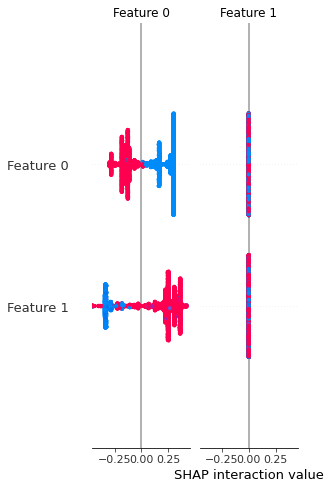

In [22]:
# Assuming 'model' is your trained model
explainer = shap.Explainer(dt_clf, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot SHAP values for a specific prediction (e.g., index 0)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)


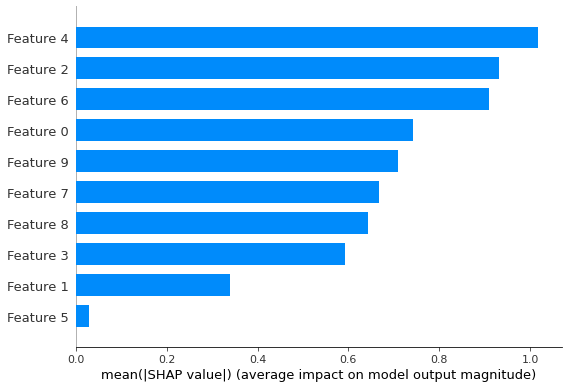

In [23]:
# Assuming 'model' is your trained model
explainer = shap.Explainer(lr_clf, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot SHAP values for a specific prediction (e.g., index 0)
shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)


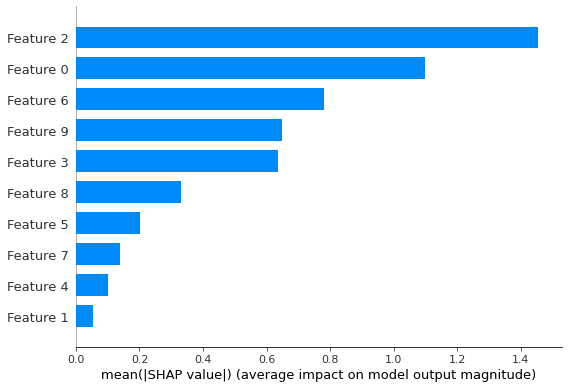

In [24]:
# Assuming 'model' is your trained model
explainer = shap.Explainer(gb_clf, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot SHAP values for a specific prediction (e.g., index 0)
shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, X_test)

In [25]:
#Storing label mapping for use in prompting our chatbot to give explainable results
label_mapping = {
    'flag_SF': 'Connection Flag Successful',
    'same_srv_rate': 'Same Service Rate',
    'dst_host_srv_count': 'Destination Host Service Count',
    'logged_in': 'Logged In',
    'flag_S0': 'Connection Flag S0',
    'serror_rate': 'SYN Error Rate',
    'count': 'Connection Count',
    'service_http': 'Service HTTP',
    'service_private': 'Service Private',
    'dst_host_count': 'Destination Host Count'
}

In [26]:
# Assuming 'model' is your trained model
explainer = shap.Explainer(gb_clf, X_train)
shap_values = explainer.shap_values(X_test)

# Create a new dictionary to store SHAP values with corresponding labels
shap_label_values = {}

# Iterate through each feature's SHAP values and map them onto label_mapping
for i,label in enumerate(label_mapping.values()):
    shap_label_values[label] = shap_values[:,i]

# Now shap_label_values contains SHAP values mapped to their corresponding labels
print(shap_label_values)


# template = """My neural network which detects intrusion has given me the following SHAP values for each the 
# corresponding labels {label}"""
# prompt = PromptTemplate(template=template, input_variables = ["label"])
# llm_chain = LLMChain(prompt = prompt, llm = HuggingFaceHub(repo_id="google/flan-t5-xxl",
#                                                            model_kwargs={"temperature":0.7,"max_length":10000000}))
# question = f"{label}:{SHAP_score}."
# print(llm_chain.run(question))

{'Connection Flag Successful': array([ 1.19198152, -0.38854253, -1.29893675, ...,  0.81066866,
        0.81993583,  1.14004454]), 'Same Service Rate': array([ 0.08757493,  0.12241817,  0.04104094, ..., -0.03212526,
       -0.03347576,  0.01954164]), 'Destination Host Service Count': array([ 1.34213892, -0.2463217 , -1.88059009, ...,  1.80913719,
        1.81245728,  1.7480824 ]), 'Logged In': array([-0.41461905, -0.14278476, -0.7770504 , ...,  0.55608357,
        0.56219589,  0.81463665]), 'Connection Flag S0': array([ 0.06888809,  0.06888809, -0.04739487, ...,  0.06888809,
        0.06888809,  0.06888809]), 'SYN Error Rate': array([ 0.13037769,  0.24576449, -0.20391332, ...,  0.1976943 ,
        0.1976943 ,  0.08320907]), 'Connection Count': array([ 0.45221724,  0.14138028, -0.85355342, ...,  0.16875719,
        0.16531264,  0.49470295]), 'Service HTTP': array([-0.17206855,  0.046201  ,  0.01952102, ..., -0.08534622,
       -0.08534622, -0.12459355]), 'Service Private': array([ 0.1610